In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# NY Times Data
us_counties = "covid_data/us-counties.csv"
us_states = "covid_data/us-states.csv"
us_total = "covid_data/us.csv"
counties = pd.read_csv(us_counties)
states = pd.read_csv(us_states)
us = pd.read_csv(us_total)

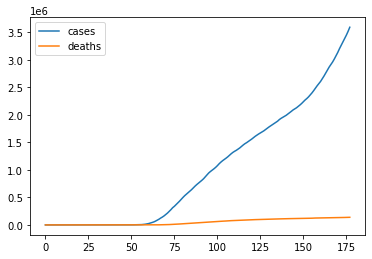

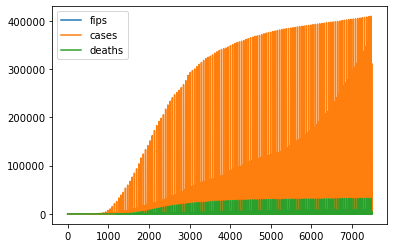

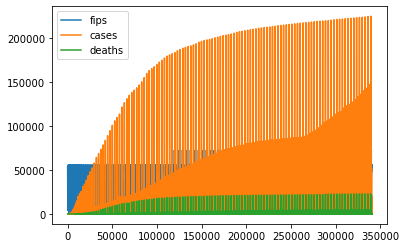

In [6]:
us.plot();
states.plot();
counties.plot();

In [10]:
trump_data = "approval_ratings/trump_ratings.csv"
trump_ratings = pd.read_csv(trump_data)
trump_ratings.head(120)

president   subgroup  modeldate  startdate    enddate  \
0    Donald Trump  All polls  7/17/2020  1/20/2017  1/22/2017   
1    Donald Trump  All polls  7/17/2020  1/20/2017  1/22/2017   
2    Donald Trump  All polls  7/17/2020  1/20/2017  1/24/2017   
3    Donald Trump  All polls  7/17/2020  1/21/2017  1/23/2017   
4    Donald Trump  All polls  7/17/2020  1/20/2017  1/25/2017   
..            ...        ...        ...        ...        ...   
115  Donald Trump  All polls  7/17/2020  2/18/2017  2/22/2017   
116  Donald Trump  All polls  7/17/2020  2/17/2017  2/23/2017   
117  Donald Trump  All polls  7/17/2020  2/18/2017  2/22/2017   
118  Donald Trump  All polls  7/17/2020  2/18/2017  2/22/2017   
119  Donald Trump  All polls  7/17/2020  2/19/2017  2/21/2017   

                                     pollster grade  samplesize population  \
0                             Morning Consult   B/C      1992.0         rv   
1                                      Gallup     B      1500.0          a   
2                                       Ipsos    B-      1632.0          a   
3                                      Gallup     B      1500.0          a   
4                       Quinnipiac University    B+      1190.0         rv   
..                                        ...   ...         ...        ...   
115                                    YouGov     B      1500.0          a   
116                              SurveyMonkey    D-     10639.0          a   
117                                     Ipsos    B-      1524.0          a   
118          NBC News/The Wall Street Journal    A-      1000.0          a   
119  Rasmussen Reports/Pulse Opinion Research    C+      1500.0         lv   

       weight  ...  disapprove  adjusted_approve  adjusted_disapprove  \
0    0.680029  ...        37.0         45.136218            37.901041   
1    0.262323  ...        45.0         45.761409            43.566085   
2    0.153481  ...        45.2         43.122312            43.865379   
3    0.242845  ...        46.0         45.761409            44.566085   
4    1.514172  ...        44.0         37.646971            42.745973   
..        ...  ...         ...               ...                  ...   
115  0.684474  ...        46.0         43.853797            48.089118   
116  0.179737  ...        54.0         41.480857            53.143317   
117  0.087763  ...        47.1         47.022312            45.765379   
118  1.646268  ...        48.0         43.209876            48.881627   
119  0.121377  ...        49.0         45.591958            50.355536   

     multiversions  tracking  \
0              NaN       NaN   
1              NaN         T   
2              NaN         T   
3              NaN         T   
4              NaN       NaN   
..             ...       ...   
115            NaN       NaN   
116            NaN       NaN   
117            NaN         T   
118            NaN       NaN   
119            NaN         T   

                                                   url poll_id question_id  \
0    http://static.politico.com/9b/13/82a3baf542ae9...   49249       77261   
1    http://www.gallup.com/poll/201617/gallup-daily...   49253       77265   
2              http://polling.reuters.com/#poll/CP3_2/   49426       77599   
3    http://www.gallup.com/poll/201617/gallup-daily...   49262       77274   
4    https://poll.qu.edu/national/release-detail?Re...   49260       77272   
..                                                 ...     ...         ...   
115  http://d25d2506sfb94s.cloudfront.net/cumulus_u...   49325       77341   
116  https://drive.google.com/file/d/0BztOs71zt1WpM...   49330       77346   
117            http://polling.reuters.com/#poll/CP3_2/   49397       77570   
118  https://www.scribd.com/document/340335355/1705...   49326       77342   
119  http://www.rasmussenreports.com/public_content...   49323       77339   

     createddate       timestamp  
0      1/23/2017  7/17/2020 9:53  
1      1/23/2017  7/1

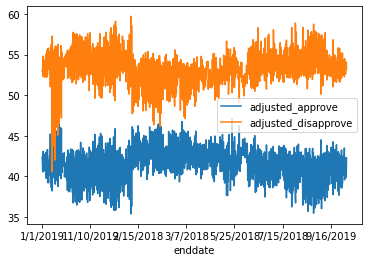

In [11]:
avg_trump_ratings =trump_ratings.groupby('enddate').agg({'adjusted_approve': 'mean', 'adjusted_disapprove': 'mean'})
avg_trump_ratings.plot();
#trump_ratings.plot(kind='line', x='enddate', y='disapprove')

In [9]:
# John's Hopkins Data
jh_data = "covid_data/time_series_covid19_deaths_US.csv"
jh_covid = pd.read_csv(jh_data)
jh_covid.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key', 'Population', 'Country_Region'], inplace=True)
jh_covid.head(10)

Province_State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            American Samoa        0        0        0        0        0   
1                      Guam        0        0        0        0        0   
2  Northern Mariana Islands        0        0        0        0        0   
3               Puerto Rico        0        0        0        0        0   
4            Virgin Islands        0        0        0        0        0   
5                   Alabama        0        0        0        0        0   
6                   Alabama        0        0        0        0        0   
7                   Alabama        0        0        0        0        0   
8                   Alabama        0        0        0        0        0   
9                   Alabama        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  1/30/20  ...  7/8/20  7/9/20  7/10/20  7/11/20  \
0        0        0        0        0  ...       0       0        0        0   
1        0        0        0        0  ...       5       5        5        5   
2        0        0        0        0  ...       2       2        2        2   
3        0        0        0        0  ...     159     159      159      167   
4        0        0        0        0  ...       6       6        6        6   
5        0        0        0        0  ...      12      13       14       14   
6        0        0        0        0  ...       9      10       11       11   
7        0        0        0        0  ...       2       2        2        2   
8        0        0        0        0  ...       1       1        1        1   
9        0        0        0        0  ...       1       1        1        1   

   7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  
0        0        0        0        0        0        0  
1        5        5        5        5        5        5  
2        2        2        2        2        2        2  
3      167      167      169      171      172      177  
4        6        6        6        6        6        6  
5       15       15       17       18       19       20  
6       11       11       11       12       13       13  
7        2        2        3        3        3        3  
8        1        1        2        2        2        2  
9        1        1        1        1        1        1  

[10 rows x 179 columns]

In [ ]:
jh_pivot = pd.pivot_table(jh_covid, index=['Province_State'], aggfunc=np.sum, fill_value=0)
jh_pivot.head(10)